<a href="https://colab.research.google.com/github/Aye-Nyein-Thaw/Building-Footprint-Extraction-Practical-Project/blob/toby/Unet_inferencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Mendatory modules

In [1]:
from PIL import Image
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray

# Loading Models

In [54]:
model = keras.models.load_model('/content/toby_unet_building_detection_epoch100.h5')
o_model = keras.models.load_model('/content/unet_building_detection_epoch1000.h5')

Upload your inference image

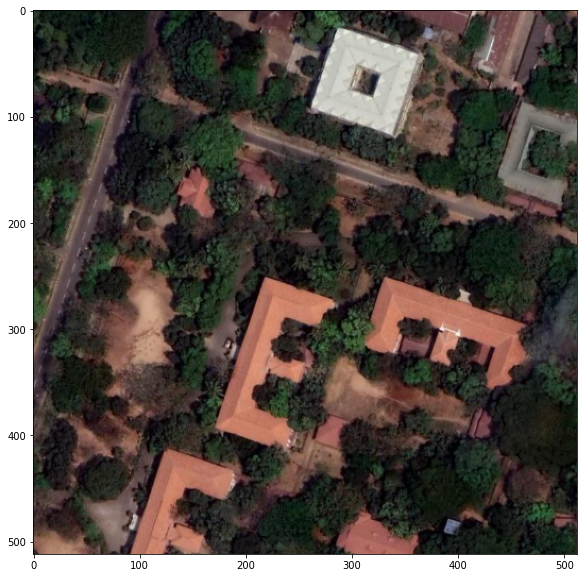

In [57]:
infer_img = Image.open('/content/YU/processed_image+final_00013_a0.png')
plt.figure(figsize=(10,10))
plt.imshow(infer_img)
img = asarray(infer_img)

# Predictions

In [58]:
testing = np.expand_dims(infer_img,axis=0)
preds = model.predict(testing,verbose=1)
o_preds = o_model.predict(testing,verbose=1)
o_preds = np.argmax(o_preds[0],axis=-1)


1/1 [==============================] - 0s 18ms/step


# Plotting and Visualization

Text(0.5, 1.0, 'Inferenced RGB image')

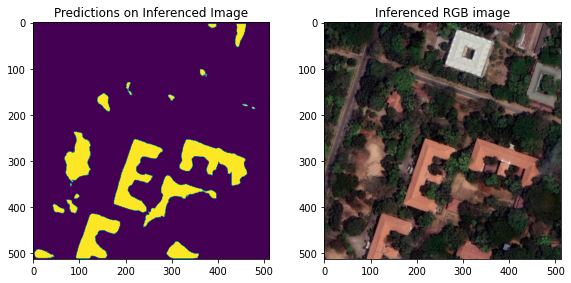

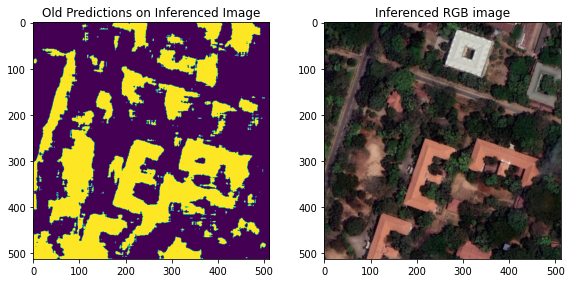

In [70]:
plt.figure(figsize=(20,20))
plt.subplot(441)
plt.imshow(np.squeeze(preds>=0.95))
plt.title("Predictions on Inferenced Image")
plt.subplot(442)
plt.imshow(np.squeeze(img))
plt.title("Inferenced RGB image")
plt.figure(figsize=(20,20))
plt.subplot(443)
plt.imshow(np.squeeze(o_preds>=0.9))
plt.title("Old Predictions on Inferenced Image")
plt.subplot(444)
plt.imshow(img)
plt.title("Inferenced RGB image")

In [32]:
np.unique(preds)

array([1.6412572e-05, 1.7157683e-05, 1.7740800e-05, ..., 9.9791688e-01,
       9.9793077e-01, 9.9795640e-01], dtype=float32)